In [1]:
from Ngram import Ngram
import numpy as np 
import random
import math
from matplotlib import pyplot as pyplot
models = {}
for i in range(1,3):
    models[str(i)+'gram'] = Ngram(i)

In [2]:
def prob(model,cont,wrd):

        try:
            denom = float(model.occs_count[cont])
            temp = list(cont)
            temp.append(wrd)
            num = model.context_count[tuple(temp)]
            return num/denom
        except:
            return 0

def prob_mladd(model,cont,wrd,k=1):
        cont = tuple(cont)
        if cont in model.occs_count:
            denom = float(model.occs_count[cont]) + k*len(model.train_vocab.keys());num=0
            if wrd in model.occurences[cont]:
                temp = list(cont)
                temp.append(wrd)
                num = model.context_count[tuple(temp)]+k     
            else:
                num = k
            return num/denom
        else:
            return 1/len(model.train_vocab.keys())

def generateAddK(model,text_len,k=1):
        n = model.n
        context = ['<s>']*(n-1)
        res = [];i = 0;perp=0
        while i<text_len:
            wrd_probs = {}
            con = tuple(context)
            for wrd in list(model.test_vocab.keys()):
                wrd_probs[wrd] = prob_mladd(model,con,wrd,k=k)
            wrd = np.random.choice(list(wrd_probs.keys()),1,list(wrd_probs.values()))[0]
            if wrd == '</s>':
                if n!=-1:context = ['<s>']*(n-1)
                res.append('.')
            else:
                if n!=1:context.pop(0);context.append(wrd)
                perp+=math.log(wrd_probs[wrd])
                res.append(wrd)
                i+=1
        perp = math.exp(abs(perp/len(res)))
        return ' '.join(res),perp

In [5]:
avg_perp = []
for i in range(1,9):
    text,perp = generateAddK(models[str(i)+'gram'],50)
    print(f'MODEL : {i}gram\nGenerated text : \n{text}\nPerplexity = {perp}')
    perp = 0
    for j in range(50):
        perp += generateAddK(models[str(i)+'gram'],50)[1]
    avg_perp.append(perp/50)

('proper walked ini quiet mudblood malkin’s eyebrows xenophilius whirl approved wandless mess suppose legends bogrod’s trip similar easter undreamed noted genius armpits shirt intruder’s cursel crib snivellus past marionette confringov’ assistance shocked subjected harm’s chance breakthroughs jogging muggle miracle destinies widest defended losses bustling immeasurably grief held deputies made stops',
 20383.67156466757)

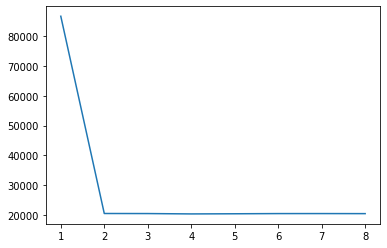

In [13]:
pyplot.plot([i for i in range(1,9)],avg_perp)

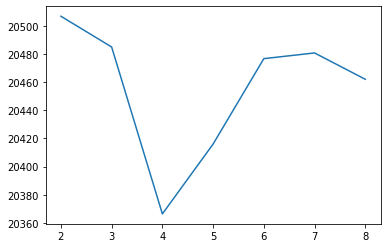

In [14]:
pyplot.plot([i for i in range(2,9)],avg_perp[1:])

The perplexity values are high for all models, as words with otherwise zero probabilites have been given some

probability which effects the text generation